# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Amanda Chung
- Christine Fann
- Darren Liu
- Kylee Peng
- Priscila Romero

# Group Members IDs

- A########
- A########
- A15040930
- A########
- A########

# Research Question

What is the relationship between a college major and post-graduate success?
- What are the most successful majors?
    - Is there a relationship between employment rate and median income?
- How does graduating with a certain major impact one's future career in pursuing further education or job opportunities? 
    - Quantify based on full time jobs that require a degree vs. jobs that don’t require a degree
    - Part time vs Full time rates
- What is the male to female ratio for popular majors? Percentage of women vs median income.


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

All our datasets are from https://github.com/fivethirtyeight/data/tree/master/college-majors

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read datasets
all_ages = pd.read_csv('data/all-ages.csv')
grad_students = pd.read_csv('data/grad-students.csv')
recent_grads = pd.read_csv('data/recent-grads.csv')
women_stem = pd.read_csv('data/women-stem.csv')

# Data Cleaning

### Extract wanted columns

In [3]:
wanted_cols = 'Rank Major Major_category Employed Full_time Part_time Median P25th P75th Total'.split()
rec_wanted = recent_grads.copy()[wanted_cols]
rec_wanted.head()

,Rank,Major,Major_category,Employed,Full_time,Part_time,Median,P25th,P75th,Total
0,1,PETROLEUM ENGINEERING,Engineering,1976,1849,270,110000,95000,125000,2339.0
1,2,MINING AND MINERAL ENGINEERING,Engineering,640,556,170,75000,55000,90000,756.0
2,3,METALLURGICAL ENGINEERING,Engineering,648,558,133,73000,50000,105000,856.0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,758,1069,150,70000,43000,80000,1258.0
4,5,CHEMICAL ENGINEERING,Engineering,25694,23170,5180,65000,50000,75000,32260.0


### Feature Engineering
Changing the following columns:
- Employed -> Employment_rate
- Full_time -> Full_time_rate
- Part_time -> Part_time_rate

Creating the following columns
- Unemployment_rate

In [4]:
# Employment rate
rec_wanted['Employment_rate'] = rec_wanted['Employed'] / rec_wanted['Total']

# Unemployment_rate
rec_wanted['Unemployment_rate'] = 1 - rec_wanted['Employment_rate']

# Full time rate
rec_wanted['Full_time_rate'] = rec_wanted['Full_time'] / rec_wanted['Total']

# Part time rate 
rec_wanted['Part_time_rate'] = rec_wanted['Part_time'] / rec_wanted['Total']

rec_wanted = rec_wanted.drop('Employed Full_time Part_time'.split(), axis=1).dropna().reset_index(drop=True)
rec_wanted.head()

,Rank,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Unemployment_rate,Full_time_rate,Part_time_rate
0,1,PETROLEUM ENGINEERING,Engineering,110000,95000,125000,2339.0,0.844805,0.155195,0.790509,0.115434
1,2,MINING AND MINERAL ENGINEERING,Engineering,75000,55000,90000,756.0,0.846561,0.153439,0.735450,0.224868
2,3,METALLURGICAL ENGINEERING,Engineering,73000,50000,105000,856.0,0.757009,0.242991,0.651869,0.155374
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,43000,80000,1258.0,0.602544,0.397456,0.849762,0.119237
4,5,CHEMICAL ENGINEERING,Engineering,65000,50000,75000,32260.0,0.796466,0.203534,0.718227,0.160570


In [5]:
# notice that one major has an employment rate of 0
rec_wanted.Employment_rate.sort_values().head()

72     0.000000
120    0.553532
3      0.602544
164    0.629418
60     0.632842
Name: Employment_rate, dtype: float64

In [6]:
# explore that row
rec_wanted[rec_wanted.Employment_rate == 0]

,Rank,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Unemployment_rate,Full_time_rate,Part_time_rate
72,74,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,40000,40000,40000,124.0,0.0,1.0,0.895161,0.0


In [7]:
# look at row in original df
recent_grads[recent_grads.Rank == 74].T

,73
Rank,74
Major_code,3801
Major,MILITARY TECHNOLOGIES
Total,124
Men,124
Women,0
Major_category,Industrial Arts & Consumer Services
ShareWomen,0
Sample_size,4
Employed,0


In [8]:
# Military technologies seems to use a different way of reporting this data; there is no number for employed
# versus unemployed. For the sake of this analysis, we will drop that column
rec_wanted = rec_wanted[rec_wanted.Rank != 74]

# Data Analysis & Results

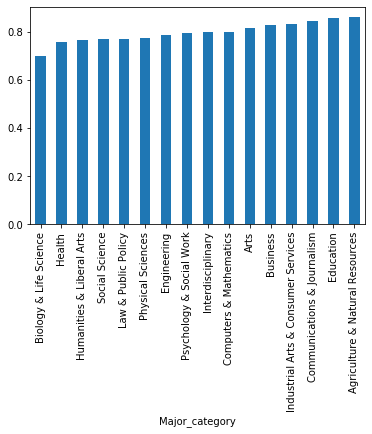

In [16]:
rec_wanted.groupby('Major_category')['Employment_rate'].mean().sort_values().plot(kind='bar')

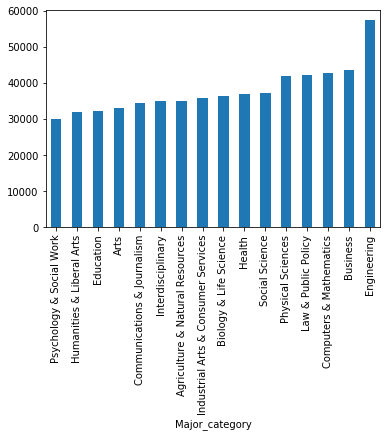

In [17]:
rec_wanted.groupby('Major_category')['Median'].mean().sort_values().plot(kind='bar')

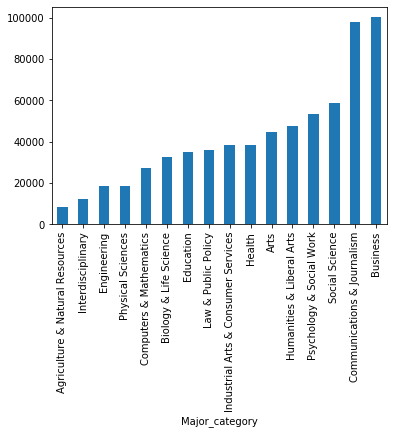

In [18]:
rec_wanted.groupby('Major_category')['Total'].mean().sort_values().plot(kind='bar')

## Relationship between employment rate and median income

R-Value = -0.013332521799603834


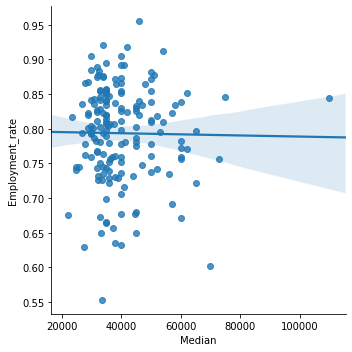

In [9]:
sns.lmplot(data=rec_wanted, x='Median', y='Employment_rate')
rval = linregress(rec_wanted['Median'], rec_wanted['Employment_rate']).rvalue
print('R-Value = ' + str(rval))

In [10]:
# bin columns to see if interesting
emp_med = rec_wanted.copy()[['Employment_rate', 'Median']]

Text(0.5, 1.0, 'Employment Rate Histogram')

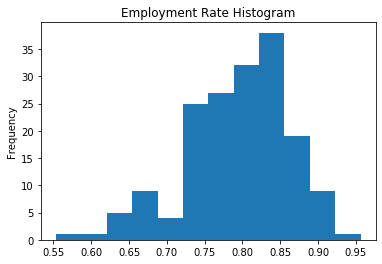

In [11]:
emp_med.Employment_rate.plot.hist(bins=12).set_title('Employment Rate Histogram')

Text(0.5, 1.0, 'Median Income Histogram')

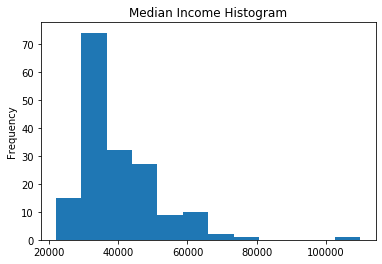

In [12]:
emp_med.Median.plot.hist(bins=12).set_title('Median Income Histogram')

In [13]:
# categorizing employment rate and median as new columns
def categorize(val):
    '''
    Categorizes the bins as 1, 2, 3, 4, 5, 6 from low to high:
    '''
    if 1 <= val <= 2:
        return 1
    if 3 <= val <= 4:
        return 2
    if 5 <= val <= 6:
        return 3
    if 7 <= val <= 8:
        return 4
    if 9 <= val <= 10:
        return 5
    return 6

emp_med['emp_binned'] = pd.qcut(emp_med['Employment_rate'], 12, labels = np.arange(1, 13)).apply(categorize)
emp_med['med_binned'] = pd.cut(emp_med['Median'], 12, labels = np.arange(1, 13))
emp_med.head()

,Employment_rate,Median,emp_binned,med_binned
0,0.844805,110000,5,12
1,0.846561,75000,5,8
2,0.757009,73000,2,7
3,0.602544,70000,1,7
4,0.796466,65000,3,6


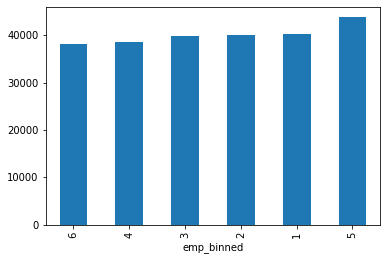

In [14]:
inc_vs_emp = emp_med.groupby('emp_binned')['Median'].mean()
inc_vs_emp.sort_values().plot.bar()

## Best combo based on z-scores

In [29]:
rec_wanted.head()

,Rank,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Unemployment_rate,Full_time_rate,Part_time_rate
0,1,PETROLEUM ENGINEERING,Engineering,110000,95000,125000,2339.0,0.844805,0.155195,0.790509,0.115434
1,2,MINING AND MINERAL ENGINEERING,Engineering,75000,55000,90000,756.0,0.846561,0.153439,0.735450,0.224868
2,3,METALLURGICAL ENGINEERING,Engineering,73000,50000,105000,856.0,0.757009,0.242991,0.651869,0.155374
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,43000,80000,1258.0,0.602544,0.397456,0.849762,0.119237
4,5,CHEMICAL ENGINEERING,Engineering,65000,50000,75000,32260.0,0.796466,0.203534,0.718227,0.160570


## What if we want to see what the best major is given certain requirements?

In [36]:
cols = ['Median', 'Employment_rate', 'Full_time_rate', 'Total']

def optimize(df, cols):
    '''
    Optimize major to choose based on values selected
    '''
    wanted = df[cols]
    def standardize(col):
        return (col - col.mean()) / col.std()
    wanted_z = wanted.apply(standardize)
    wanted_z = pd.concat([wanted_z, df.Major], axis=1)
    wanted_z['Sums'] = wanted_z[cols].sum(axis=1)
    return wanted_z.sort_values(by='Sums', ascending=False).Major[:5].reset_index(drop=True)

optimize(rec_wanted, cols)

0                     PETROLEUM ENGINEERING
1    BUSINESS MANAGEMENT AND ADMINISTRATION
2                                   NURSING
3                                   FINANCE
4          MARKETING AND MARKETING RESEARCH
Name: Major, dtype: object

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*